<a href="https://colab.research.google.com/github/dgalian/FTW_B7/blob/main/Capstone/Capstone_MBA_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using Market Basket Analysis to determine the typical combinations of ICD Categories per Claim**

# Import libraries and load dataset

In [207]:
# Importing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [208]:
# Load claims breakdown by diagnosis
clm_icd = pd.read_csv('/content/CLM Breakdown csv.csv')

In [209]:
# Load ICD table to get ICD category
icd_table = pd.read_excel('/content/icd_table.xlsx')

# Data Prep
Profiling, Cleaning

In [210]:
clm_icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382438 entries, 0 to 382437
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cbdcode        382438 non-null  int64  
 1   claimcode      382438 non-null  int64  
 2   icdno          382438 non-null  int64  
 3   doctorcode     382438 non-null  int64  
 4   cptno          382438 non-null  int64  
 5   sacode         382438 non-null  int64  
 6   UNIT AMT       382438 non-null  float64
 7   QTY            382438 non-null  float64
 8   INCURRED AMT   382438 non-null  float64
 9   HOSP BILL AMT  382438 non-null  float64
 10  COVERED AMT    382438 non-null  float64
 11  BILL TO        382438 non-null  object 
dtypes: float64(5), int64(6), object(1)
memory usage: 35.0+ MB


In [211]:
# Check number of claims
clm_icd['claimcode'].nunique()

166993

In [212]:
icd_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   icdno        4343 non-null   int64 
 1   icdcategory  4343 non-null   int64 
 2   icdgroup     4343 non-null   int64 
 3   ICD CODE     4343 non-null   object
 4   ICD DISEASE  4343 non-null   object
dtypes: int64(3), object(2)
memory usage: 169.8+ KB


In [213]:
# Creating basket of claims by merging claims table and icd category table
claims = pd.merge(clm_icd, icd_table, on='icdno', how='left')

In [214]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382438 entries, 0 to 382437
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cbdcode        382438 non-null  int64  
 1   claimcode      382438 non-null  int64  
 2   icdno          382438 non-null  int64  
 3   doctorcode     382438 non-null  int64  
 4   cptno          382438 non-null  int64  
 5   sacode         382438 non-null  int64  
 6   UNIT AMT       382438 non-null  float64
 7   QTY            382438 non-null  float64
 8   INCURRED AMT   382438 non-null  float64
 9   HOSP BILL AMT  382438 non-null  float64
 10  COVERED AMT    382438 non-null  float64
 11  BILL TO        382438 non-null  object 
 12  icdcategory    382355 non-null  float64
 13  icdgroup       382355 non-null  float64
 14  ICD CODE       382355 non-null  object 
 15  ICD DISEASE    382355 non-null  object 
dtypes: float64(7), int64(6), object(3)
memory usage: 49.6+ MB


In [215]:
claims.isnull().sum()

cbdcode           0
claimcode         0
icdno             0
doctorcode        0
cptno             0
sacode            0
UNIT AMT          0
QTY               0
INCURRED AMT      0
HOSP BILL AMT     0
COVERED AMT       0
BILL TO           0
icdcategory      83
icdgroup         83
ICD CODE         83
ICD DISEASE      83
dtype: int64

In [216]:
null_icd = claims[claims['icdcategory'].isnull()]
null_icd['claimcode'].nunique()

46

**46 claims do not have an ICD category**

In [217]:
# Drop null values
claims = claims.dropna()
claims.isnull().sum()

cbdcode          0
claimcode        0
icdno            0
doctorcode       0
cptno            0
sacode           0
UNIT AMT         0
QTY              0
INCURRED AMT     0
HOSP BILL AMT    0
COVERED AMT      0
BILL TO          0
icdcategory      0
icdgroup         0
ICD CODE         0
ICD DISEASE      0
dtype: int64

In [218]:
# Convert Claim code and ICD Category into categorical data
claims['claimcode'] = claims['claimcode'].astype(str)
claims['icdcategory'] = claims['icdcategory'].astype(int).astype(str)
claims['sacode'] = claims['sacode'].astype(int).astype(str)

In [219]:
# Drop other columns
claims = claims[['claimcode','icdno','icdcategory','ICD CODE','ICD DISEASE','sacode']]
claims.head()

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode
0,203746,6127,84,G90.0,Idiopathic peripheral autonomic neuropathy,3718
1,203913,40054,261,W55,Contact with other mammals,3747
2,203913,40054,261,W55,Contact with other mammals,3750
3,203913,40054,261,W55,Contact with other mammals,3953
4,203913,40054,261,W55,Contact with other mammals,3954


In [220]:
# Check claim with duplicate ICD category 
claims[claims['claimcode']=='203913']

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode
1,203913,40054,261,W55,Contact with other mammals,3747
2,203913,40054,261,W55,Contact with other mammals,3750
3,203913,40054,261,W55,Contact with other mammals,3953
4,203913,40054,261,W55,Contact with other mammals,3954
5,203913,40054,261,W55,Contact with other mammals,3843
6,203913,40054,261,W55,Contact with other mammals,3726


In [221]:
# Check number of unique ICD categories in claims
claims['icdcategory'].nunique()

241

In [222]:
241/290

0.8310344827586207

**241 out of 290 or 83% of ICD categories are present in the claims.**

In [223]:
# Removing duplicate ICD categories in claims, since we are only looking at the occurance of the ICD category per claim
claims['claims_icd'] = claims[['claimcode', 'icdcategory']].agg('_'.join, axis=1)
claims_icd = claims.drop_duplicates(subset='claims_icd')

In [224]:
claims['icdcategory'].nunique()

241

In [225]:
claims_icd[claims_icd['icdcategory']=='0']

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd
120,208601,77693,0,A09.1,AGE WITH MOD./MARKED DHN,3812,208601_0
723,212928,77693,0,A09.1,AGE WITH MOD./MARKED DHN,3747,212928_0
1068,213902,77689,0,1,LACK OF DOCUMENTS,3718,213902_0
1358,214385,77771,0,I10.0,HPN STAGE I,3718,214385_0
1516,214739,77695,0,A09.3,AGE WITH NO SIGNS OF DHN,3747,214739_0
...,...,...,...,...,...,...,...
382205,602217,77782,0,U07.1,"COVID-19, virus identified",3718,602217_0
382208,602620,77771,0,I10.0,HPN STAGE I,3816,602620_0
382233,607092,77782,0,U07.1,"COVID-19, virus identified",3747,607092_0
382308,616034,77771,0,I10.0,HPN STAGE I,3718,616034_0


In [226]:
# Dropping ICD Category 0
claims_icd = claims_icd[claims_icd.icdcategory != '0']
claims_icd[claims_icd['icdcategory']=='0']

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd


In [227]:
# Checking number of ICD categories per claim
claims_icd['claimcode'].value_counts().sort_values(ascending=False)

305146    10
309069    10
328555    10
355547     9
377387     9
          ..
453359     1
453361     1
453363     1
453376     1
658022     1
Name: claimcode, Length: 161973, dtype: int64

In [228]:
claims_icd[claims_icd['claimcode']=='328555']

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd
201183,328555,12785,130,K76.0,"Fatty (change of) liver, not elsewhere classified",3807,328555_130
201184,328555,46010,158,M81.9,"Osteoporosis, unspecified",3803,328555_158
201186,328555,25106,216,R80.9,"Proteinuria, unspecified",3808,328555_216
201188,328555,3857,54,E11,Type 2 diabetes mellitus,3803,328555_54
201189,328555,14648,144,M06.9,"Rheumatoid arthritis, unspecified",3800,328555_144
201190,328555,4467,61,E87.8,Other disorders of electrolyte and fluid balan...,3803,328555_61
201191,328555,3639,53,E03.9,"Hypothyroidism, unspecified",3806,328555_53
201192,328555,20895,167,N20.9,"Urinary calculus, unspecified",3978,328555_167
201193,328555,10140,105,I25.1,Atherosclerotic heart disease of native corona...,3853,328555_105
201195,328555,10341,107,I49.9,"Cardiac arrhythmia, unspecified",3816,328555_107


In [229]:
# Considering only claims with 2 or more ICD categories
claims_icdcombo = claims_icd.groupby('claimcode').filter(lambda x : x['claimcode'].shape[0]>1)
claims_icdcombo['claimcode'].value_counts().sum()

37304

In [230]:
claims_icdcombo.head()

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd
7815,220945,11745,113,J18.9,"Pneumonia, unspecified organism",1196,220945_113
7822,220945,21009,169,N39.0,"Urinary tract infection, site not specified",3812,220945_169
7828,220946,76619,104,I10.9,Essential Hypertension; malignant hypertension,3952,220946_104
7829,220946,3857,54,E11,Type 2 diabetes mellitus,4020,220946_54
7831,220946,11745,113,J18.9,"Pneumonia, unspecified organism",3712,220946_113


In [231]:
37304/166993

0.22338660901953974

**37,304 out of 166,993 or 22% of the claims has 2 or more ICD categories.**

## Preparing Transaction List

In [232]:
# Load ICD table to get ICD category
icd_desc = pd.read_csv('/content/icd_category_categorydes.csv')

# Convert icdcategory  into categorical data
icd_desc['icdcategory'] = icd_desc['icdcategory'].astype(int).astype(str)

# Merge the claims breakdown and idc category description table
claims_icdcombo = pd.merge(claims_icdcombo, icd_desc, on='icdcategory', how='left')
claims_icdcombo.head()

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd,ICD CATEGORY
0,220945,11745,113,J18.9,"Pneumonia, unspecified organism",1196,220945_113,Influenza and pneumonia (J09-J18)
1,220945,21009,169,N39.0,"Urinary tract infection, site not specified",3812,220945_169,Other diseases of the urinary system (N30-N39)
2,220946,76619,104,I10.9,Essential Hypertension; malignant hypertension,3952,220946_104,Hypertensive diseases (I10-I15)
3,220946,3857,54,E11,Type 2 diabetes mellitus,4020,220946_54,Diabetes mellitus (E08-E13)
4,220946,11745,113,J18.9,"Pneumonia, unspecified organism",3712,220946_113,Influenza and pneumonia (J09-J18)


In [233]:
# Get list ICD Categories by Claim number
transactions = claims_icdcombo.groupby('claimcode').agg(lambda col: ','.join(col)).reset_index()
transactions.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,claimcode,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd,ICD CATEGORY
0,220945,"113,169","J18.9,N39.0","Pneumonia, unspecified organism,Urinary tract ...","1196,3812","220945_113,220945_169","Influenza and pneumonia (J09-J18),Other diseas..."
1,220946,"104,54,113","I10.9,E11,J18.9",Essential Hypertension; malignant hypertension...,"3952,4020,3712","220946_104,220946_54,220946_113","Hypertensive diseases (I10-I15),Diabetes melli..."
2,230470,"53,54,105","E03.9,E11,I25.0","Hypothyroidism, unspecified,Type 2 diabetes me...","3806,3808,3979","230470_53,230470_54,230470_105","Disorders of thyroid gland (E00-E07),Diabetes ..."
3,232051,"169,53,104","N39.0,E05.9,I11.9","Urinary tract infection, site not specified,Th...","3812,3806,3816","232051_169,232051_53,232051_104",Other diseases of the urinary system (N30-N39)...
4,251715,"54,104","E11,I10.9","Type 2 diabetes mellitus,Essential Hypertensio...","3803,3821","251715_54,251715_104","Diabetes mellitus (E08-E13),Hypertensive disea..."


In [234]:
transactions['icd'] = transactions['ICD CATEGORY'].apply(lambda t: t.split(','))
transactions = transactions['icd']
transactions.head()

0    [Influenza and pneumonia (J09-J18), Other dise...
1    [Hypertensive diseases (I10-I15), Diabetes mel...
2    [Disorders of thyroid gland (E00-E07), Diabete...
3    [Other diseases of the urinary system (N30-N39...
4    [Diabetes mellitus (E08-E13), Hypertensive dis...
Name: icd, dtype: object

In [235]:
transaction_list = list(transactions)
transaction_list[:5]

[['Influenza and pneumonia (J09-J18)',
  'Other diseases of the urinary system (N30-N39)'],
 ['Hypertensive diseases (I10-I15)',
  'Diabetes mellitus (E08-E13)',
  'Influenza and pneumonia (J09-J18)'],
 ['Disorders of thyroid gland (E00-E07)',
  'Diabetes mellitus (E08-E13)',
  'Ischemic heart diseases (I20-I25)'],
 ['Other diseases of the urinary system (N30-N39)',
  'Disorders of thyroid gland (E00-E07)',
  'Hypertensive diseases (I10-I15)'],
 ['Diabetes mellitus (E08-E13)', 'Hypertensive diseases (I10-I15)']]

## One Hot Encoding

In [236]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(transaction_list)

# One-hot encode transactions
onehot = encoder.transform(transaction_list)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot

,,accommodation and refraction (H49-H52),adverse effects of and underdosing of drugs,and certain specified histologies,and of lymphoid,arterioles and capillaries (I70-I79),biliary tract and pancreas (K80-K87),binocular movement,brain and other parts of central nervous system (C69-C72),cornea,...,Symptoms and signs involving the skin and subcutaneous tissue (R20-R23),Systemic atrophies primarily affecting the central nervous system (G10-G14),Systemic connective tissue disorders (M30-M36),Toxic effects of substances chiefly nonmedicinal as to source (T51-T65),Transport accidents (V00-V99),Tuberculosis (A15-A19),Urolithiasis (N20-N23),Urticaria and erythema (L49-L54),Viral hepatitis (B15-B19),Viral infections characterized by skin and mucous membrane lesions (B00-B09)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13873,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13874,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# MBA - Diagnosis that are claimed together

##Apriori

In [237]:
# Choose max_len
claims_icdcombo['claimcode'].value_counts().describe()

count    13878.000000
mean         2.687995
std          1.018211
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: claimcode, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Claims')

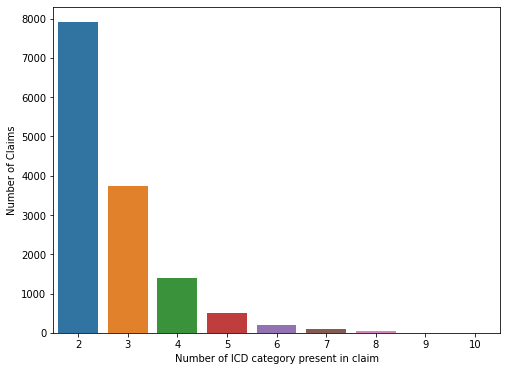

In [238]:
icd_count = pd.DataFrame(claims_icdcombo['claimcode'].value_counts())
plt.figure(figsize=(8,6))
ax = sns.countplot('claimcode', data=icd_count)
ax.set_xlabel('Number of ICD category present in claim')
ax.set_ylabel('Number of Claims')

Text(0, 0.5, 'Number of ICD category present in claim')

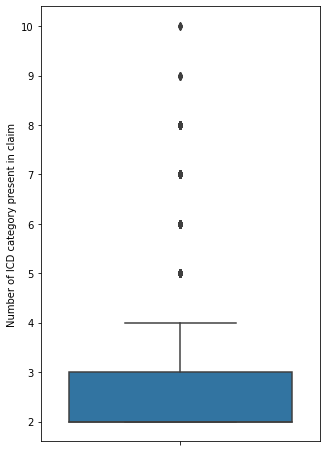

In [239]:
plt.figure(figsize=(5,8))
ax = sns.boxplot(y='claimcode', data=icd_count)
ax.set_ylabel('Number of ICD category present in claim')

We will choose max length of 3.

In [240]:
from mlxtend.frequent_patterns import apriori

# Getting all combinations of item sets
frequent_itemsets = apriori(onehot, 
                            min_support = 0.001, 
                            max_len = 4, 
                            use_colnames = True).sort_values('support',ascending=False)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
80,0.428376,(Metabolic disorders (E70-E88)),1
62,0.408632,(Hypertensive diseases (I10-I15)),1
39,0.236922,(Diabetes mellitus (E08-E13)),1
94,0.225897,(Other disorders of glucose regulation and pan...,1
434,0.153480,"(Hypertensive diseases (I10-I15), Metabolic di...",2
...,...,...,...
1216,0.001009,"(Diabetes mellitus (E08-E13), Disorders of thy...",4
1215,0.001009,(Other diseases of the urinary system (N30-N39...,4
1064,0.001009,"(Diseases of male genital organs (N40-N53), Di...",4
1071,0.001009,"(Diabetes mellitus (E08-E13), Metabolic disord...",4


**Min support is 0 for frequent_itemsets**

##Apriori results pruning

### Association Rule #1 - Confidence = 0.65

In [241]:
from mlxtend.frequent_patterns import association_rules

rules_1 = association_rules(frequent_itemsets, 
                          metric = "confidence", 
                         	min_threshold = 0.65).sort_values('confidence',ascending=False)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Abnormal findings on examination of blood),( without diagnosis (R70-R79)),0.081640,0.081640,0.081640,1.000000,12.248897,0.074975,inf
789,"(Hypertensive diseases (I10-I15), Injuries to ...","( pelvis and external genitals (S30-S39), low...",0.001585,0.007422,0.001585,1.000000,134.737864,0.001573,inf
764,"(Disorders of thyroid gland (E00-E07), Disorde...",( biliary tract and pancreas (K80-K87)),0.001729,0.060527,0.001729,1.000000,16.521429,0.001625,inf
765,( not elsewhere classified (E89)),(Postprocedural endocrine and metabolic compli...,0.001729,0.001729,0.001729,1.000000,578.250000,0.001726,inf
766,(Postprocedural endocrine and metabolic compli...,( not elsewhere classified (E89)),0.001729,0.001729,0.001729,1.000000,578.250000,0.001726,inf
...,...,...,...,...,...,...,...,...,...
848,(Other diseases of the urinary system (N30-N39...,(Metabolic disorders (E70-E88)),0.002162,0.428376,0.001441,0.666667,1.556266,0.000515,1.714872
732,"(Diseases of liver (K70-K77), Acute kidney fai...",(Metabolic disorders (E70-E88)),0.002810,0.428376,0.001873,0.666667,1.556266,0.000670,1.714872
554,"(Ischemic heart diseases (I20-I25), Abnormal f...",(Metabolic disorders (E70-E88)),0.004972,0.428376,0.003315,0.666667,1.556266,0.001185,1.714872
966,"(Diabetes mellitus (E08-E13), Metabolic disord...",(Diseases of liver (K70-K77)),0.001873,0.149733,0.001225,0.653846,4.366736,0.000944,2.456326


### Association Rule #2 - Antecedent Support, Consequent Support, Zhang

**Zhang's rule**

In [242]:
# Define a new zhang's metric function
def zhangs_rule(rules):
	PAB = rules['support'].copy()
	PA = rules['antecedent support'].copy()
	PB = rules['consequent support'].copy()
	NUMERATOR = PAB - PA*PB
	DENOMINATOR = np.max((PAB*(1-PA).values,PA*(PB-PAB).values), axis = 0)
	return NUMERATOR / DENOMINATOR

In [243]:
# Generate the initial set of rules using a minimum lift of 1.00 on frequent_itemsets (all combinations)
rules_2 = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)

# Set antecedent support to 0.01
rules_2 = rules_2[rules_2['antecedent support'] > 0.002]

# Set consequent support to 0.01
rules_2 = rules_2[rules_2['consequent support'] > 0.02]

# Compute Zhang's rule
rules_2['zhang'] = zhangs_rule(rules_2)

# Set the lower bound for Zhang's rule to 0.8
rules_2 = rules_2[rules_2['zhang'] > 0.8].sort_values('zhang',ascending=False)
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
10,(Abnormal findings on examination of blood),( without diagnosis (R70-R79)),0.081640,0.081640,0.081640,1.000000,12.248897,0.074975,inf,1.000000
32,(Abnormal findings on examination of blood),"(Hypertensive diseases (I10-I15), without dia...",0.081640,0.027958,0.027958,0.342454,12.248897,0.025675,1.478287,1.000000
11,( without diagnosis (R70-R79)),(Abnormal findings on examination of blood),0.081640,0.081640,0.081640,1.000000,12.248897,0.074975,inf,1.000000
53,( stomach and duodenum (K20-K31)),(Diseases of esophagus),0.021185,0.021185,0.021185,1.000000,47.204082,0.020736,inf,1.000000
52,(Diseases of esophagus),( stomach and duodenum (K20-K31)),0.021185,0.021185,0.021185,1.000000,47.204082,0.020736,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
4245,"(Ischemic heart diseases (I20-I25), Disorders ...","(Metabolic disorders (E70-E88), Disorders of t...",0.004179,0.059735,0.001297,0.310345,5.195375,0.001047,1.363384,0.810910
5699,"(Ischemic heart diseases (I20-I25), Diseases o...","(Diabetes mellitus (E08-E13), Disorders of thy...",0.005548,0.035452,0.001009,0.181818,5.128603,0.000812,1.178892,0.809507
4645,"(Disorders of breast (N60-N65), Diseases of li...","(Ischemic heart diseases (I20-I25), Metabolic ...",0.006053,0.038478,0.001153,0.190476,4.950241,0.000920,1.187762,0.802849
1659,(Acute upper respiratory infections (J00-J06)),"(Ischemic heart diseases (I20-I25), Diabetes m...",0.026733,0.020752,0.002522,0.094340,4.545991,0.001967,1.081253,0.801451


### Association Rule #3 - Zhang = 0.9

In [244]:
# Recover association rules using a minium support threshold of 0.001
rules_3 = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.001)
rules_3['zhang'] = zhangs_rule(rules_3)

# Apply metric thresholds
rules_3 = rules_3[rules_3['zhang'] > 0.90] 

# Print remaining rule
rules_3.sort_values('support',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
12,(Abnormal findings on examination of blood),( without diagnosis (R70-R79)),0.081640,0.081640,0.081640,1.000000,12.248897,0.074975,inf,1.000000
13,( without diagnosis (R70-R79)),(Abnormal findings on examination of blood),0.081640,0.081640,0.081640,1.000000,12.248897,0.074975,inf,1.000000
14,( biliary tract and pancreas (K80-K87)),(Disorders of gallbladder),0.060527,0.060527,0.060527,1.000000,16.521429,0.056864,inf,1.000000
15,(Disorders of gallbladder),( biliary tract and pancreas (K80-K87)),0.060527,0.060527,0.060527,1.000000,16.521429,0.056864,inf,1.000000
20,"(Metabolic disorders (E70-E88), without diagn...",(Abnormal findings on examination of blood),0.059375,0.081640,0.059375,1.000000,12.248897,0.054527,inf,0.976329
...,...,...,...,...,...,...,...,...,...,...
7305,( stated or presumed to be primary (of specifi...,"(Hypertensive diseases (I10-I15), Malignant ne...",0.004107,0.001009,0.001009,0.245614,243.473684,0.001005,1.324244,1.000000
7304,( except neuroendocrine),"(Hypertensive diseases (I10-I15), Malignant ne...",0.004107,0.001009,0.001009,0.245614,243.473684,0.001005,1.324244,1.000000
7303,(Malignant neoplasms),"(Hypertensive diseases (I10-I15), except neur...",0.004107,0.001009,0.001009,0.245614,243.473684,0.001005,1.324244,1.000000
7301,"( except neuroendocrine, stated or presumed t...","(Hypertensive diseases (I10-I15), Malignant ne...",0.004107,0.001009,0.001009,0.245614,243.473684,0.001005,1.324244,1.000000


### Association Rule #4 - Confidence & Zhang


In [245]:
# Recover association rules using a minium support threshold of 0.001
rules_5 = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.001)
rules_5['zhang'] = zhangs_rule(rules_5)

# Apply metric thresholds
rules_5 = rules_5[(rules_5['confidence'] > 0.25) &
                  (rules_5['zhang'] > 0.70)] 

# Print remaining rule
rules_5.sort_values('zhang',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
2571,(Injuries to the abdomen),"(Other soft tissue disorders (M70-M79), pelvi...",0.007422,0.002306,0.002306,0.310680,134.737864,0.002289,1.447359,1.000000
2638,( pelvis and external genitals (S30-S39)),"(Other soft tissue disorders (M70-M79), lumba...",0.007422,0.002306,0.002306,0.310680,134.737864,0.002289,1.447359,1.000000
2632,(Injuries to the abdomen),"(Other soft tissue disorders (M70-M79), lumba...",0.007422,0.002306,0.002306,0.310680,134.737864,0.002289,1.447359,1.000000
2621,(Injuries to the abdomen),"(Other soft tissue disorders (M70-M79), pelvi...",0.007422,0.002306,0.002306,0.310680,134.737864,0.002289,1.447359,1.000000
2620,( pelvis and external genitals (S30-S39)),"(Other soft tissue disorders (M70-M79), Injuri...",0.007422,0.002306,0.002306,0.310680,134.737864,0.002289,1.447359,1.000000
...,...,...,...,...,...,...,...,...,...,...
2780,"(Acute upper respiratory infections (J00-J06),...","(Diabetes mellitus (E08-E13), Metabolic disord...",0.006341,0.109310,0.002306,0.363636,3.326661,0.001613,1.399656,0.703861
3522,"(Acute upper respiratory infections (J00-J06),...",(Disorders of thyroid gland (E00-E07)),0.003747,0.149661,0.001873,0.500000,3.340876,0.001313,1.700677,0.703313
5694,"(Urolithiasis (N20-N23), Metabolic disorders (...",(Diseases of liver (K70-K77)),0.002594,0.149733,0.001297,0.500000,3.339269,0.000909,1.700533,0.702355
6220,"(Ischemic heart diseases (I20-I25), Metabolic ...",(Diseases of liver (K70-K77)),0.002306,0.149733,0.001153,0.500000,3.339269,0.000808,1.700533,0.702152


## Plotting Rule #5

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

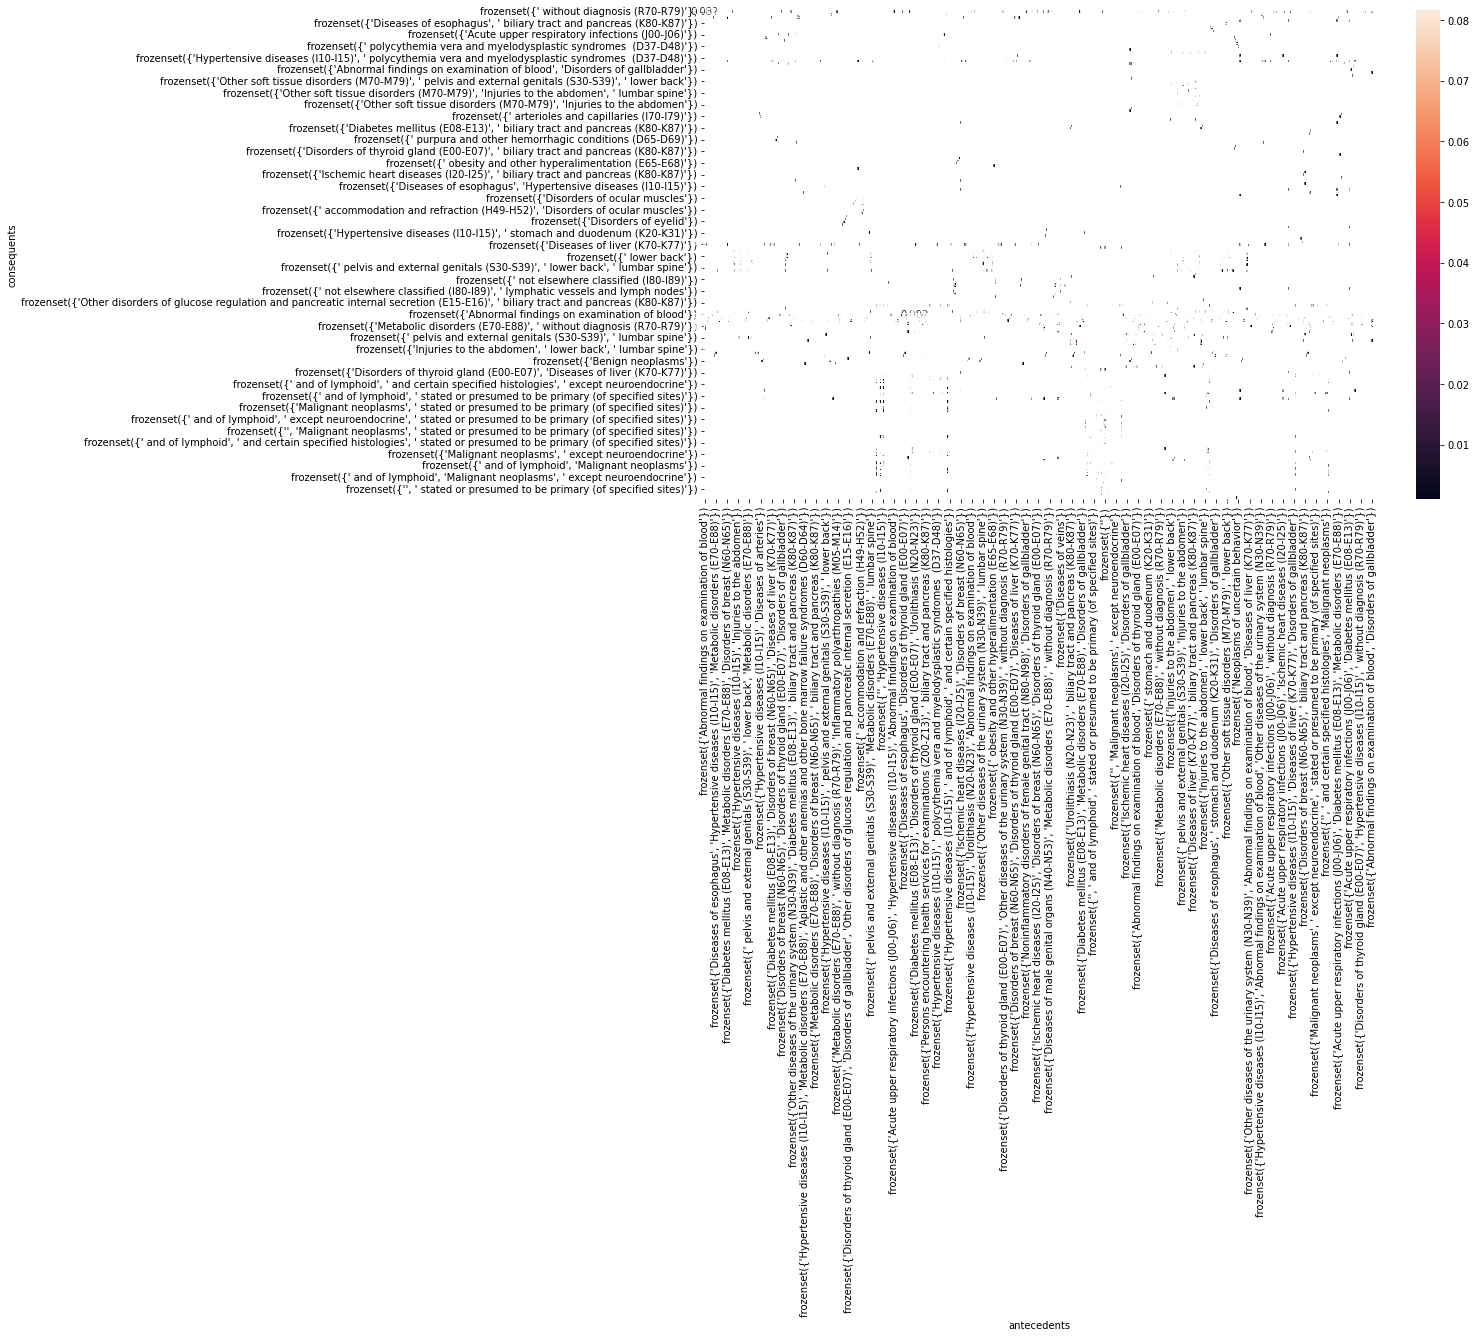

In [246]:
support_table = rules_5.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(15,9))
sns.heatmap(support_table,annot=True)

Heatmap: See association

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

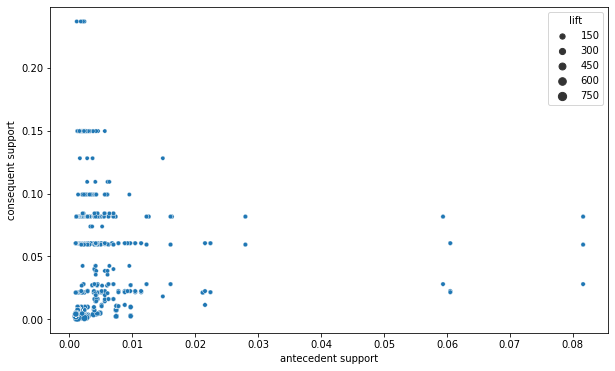

In [247]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='antecedent support', y='consequent support', size='lift', data=rules_5)

Scatterplot 


*   Identify natural thresholds of data
*   Use findings to prune



In [248]:
# Converting rules to coordinates
rules_5['antecedents'] = rules_5['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules_5['consequents'] = rules_5['consequents'].apply(lambda consequent: list(consequent)[0])
rules_5['rule'] = rules_5.index

# Define coordinates and label 
coords = rules_5[['antecedents','consequents','rule']]
coords.head()

,antecedents,consequents,rule
12,Abnormal findings on examination of blood,without diagnosis (R70-R79),12
13,without diagnosis (R70-R79),Abnormal findings on examination of blood,13
14,biliary tract and pancreas (K80-K87),Disorders of gallbladder,14
15,Disorders of gallbladder,biliary tract and pancreas (K80-K87),15
20,Metabolic disorders (E70-E88),Abnormal findings on examination of blood,20


<AxesSubplot:>

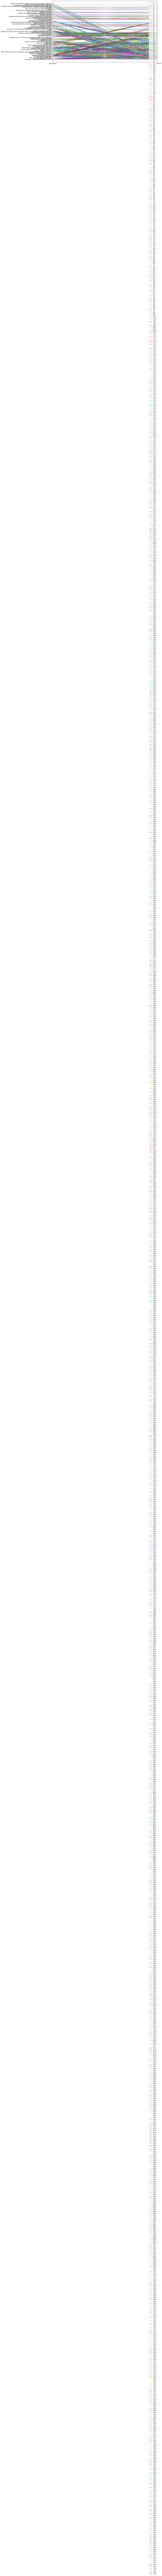

In [201]:
# Generate Parallel coordinates plot
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,9))
parallel_coordinates(coords,'rule')

# MBA - Procedures that are claimed together for a diagnosis

## Preparing Basket

In [202]:
# Combine table of claims with combination of diagnosis with the procedures
sa_table = pd.read_excel('/content/sa_table.xlsx')

# Convert SA Code to categorical
sa_table['sacode'] = sa_table['sacode'].astype(int).astype(str)

procedures_basket = pd.merge(claims_icd, sa_table, on='sacode', how='left')
procedures_basket.head()

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd,SA DESCRIPTION,SA CATEGORY
0,203746,6127,84,G90.0,Idiopathic peripheral autonomic neuropathy,3718,203746_84,CONSULTATION,HOSPITAL BILL
1,203913,40054,261,W55,Contact with other mammals,3747,203913_261,EMERGENCY ROOM,HOSPITAL BILL
2,205599,12286,124,K21,Gastro-esophageal reflux disease,3718,205599_124,CONSULTATION,HOSPITAL BILL
3,205779,43705,277,Z03.0,Observation for suspected tuberculosis,3979,205779_277,RADIOLOGY - XRAY,HOSPITAL BILL
4,205781,43705,277,Z03.0,Observation for suspected tuberculosis,3979,205781_277,RADIOLOGY - XRAY,HOSPITAL BILL


In [203]:
# Group procedures by ICD category
procedures = procedures_basket.groupby('icdcategory').agg(lambda col: ','.join(col)).reset_index()
procedures.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,icdcategory,claimcode,ICD CODE,ICD DISEASE,sacode,claims_icd
0,1,"213151,213785,214013,218616,219828,220599,2232...","A09.0,A06.9,A06.9,A09.9,A06.9,A09.9,A06.9,A09....","Infectious diarrhea,Amebiasis, unspecified,Ame...","3747,3952,3812,3750,3806,3808,3812,3718,3808,3...","213151_1,213785_1,214013_1,218616_1,219828_1,2..."
1,10,"210939,210956,211089,211104,211431,213099,2131...","A90,A90,A90,A90,A90,A90,A90,A90,A90,A90,A90,A9...","Dengue fever [classical dengue],Dengue fever [...","3821,3748,3745,3748,3808,3808,3808,3808,3808,3...","210939_10,210956_10,211089_10,211104_10,211431..."
2,100,"207518,208629,212772,215674,216818,216819,2169...","H90.42,H93.1,H93.1,H93.1,H91.9,H91.9,H91.9,H91...","Sensorineural hearing loss, unilateral, left e...","3718,3718,3828,3718,3828,3821,3828,3718,3828,3...","207518_100,208629_100,212772_100,215674_100,21..."
3,101,"345874,425423","H95.0,H95.1",Recurrent cholesteatoma of postmastoidectomy c...,"3712,3718","345874_101,425423_101"
4,102,"245378,245379,254549,257151,260686,269259,2836...","I00,I00,I00,I00,I00,I00,I01.9,I00,I00,I00,I00,...","Rheumatic fever without heart involvement,Rheu...","3816,3808,3718,3718,3800,3718,3816,3718,3718,3...","245378_102,245379_102,254549_102,257151_102,26..."


In [204]:
# Check claims where there is only 1 ICD Category present
claims_icdsingle = claims_icd.groupby('claimcode').filter(lambda x : x['claimcode'].shape[0]==1)
claims_icdsingle

,claimcode,icdno,icdcategory,ICD CODE,ICD DISEASE,sacode,claims_icd
0,203746,6127,84,G90.0,Idiopathic peripheral autonomic neuropathy,3718,203746_84
1,203913,40054,261,W55,Contact with other mammals,3747,203913_261
7,205599,12286,124,K21,Gastro-esophageal reflux disease,3718,205599_124
8,205779,43705,277,Z03.0,Observation for suspected tuberculosis,3979,205779_277
10,205781,43705,277,Z03.0,Observation for suspected tuberculosis,3979,205781_277
...,...,...,...,...,...,...,...
382433,653907,10081,104,I10,Essential (primary) hypertension,3718,653907_104
382434,653946,44709,231,T14.0,Superficial injury of unspecified body region,4092,653946_231
382435,653957,32390,229,S83.5,Sprain of cruciate ligament of knee,3718,653957_229
382436,653969,45838,154,M62.6,Muscle strain,3718,653969_154


In [205]:
claims_icdsingle['icdcategory'].value_counts().sort_values(ascending=False).head(5)

277    26007
104    15075
54      6392
61      5588
169     4355
Name: icdcategory, dtype: int64

In [206]:
procedure_277 = procedures[procedures['icdcategory']=='277']
procedure_277

,icdcategory,claimcode,ICD CODE,ICD DISEASE,sacode,claims_icd
160,277,"205779,205781,207180,207203,207206,207209,2072...","Z03.0,Z03.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00....","Observation for suspected tuberculosis,Observa...","3979,3979,3647,3647,3647,3647,3647,3647,3647,3...","205779_277,205781_277,207180_277,207203_277,20..."
